<a href="https://colab.research.google.com/github/changsin/TDD/blob/main/tdd_python/notebooks/SOLID_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLID principles for ML

SOLID Principles
1. **Single Responsibility Principle:** A class/method does just one thing.
2. **Open/Closed Principle:** Open for extension/Closed for modification.
3. **Liskov Substitition Principle:** Parent and child classes are interchangeable.
4. **Interface Segregation Principle:** Define only what is needed.
5. **Dependency Injection Principle:** Dependencies should be replaceable.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sample data
Let's assume that they are prediction results from different models and you want to compare and anlyze the results.
If you want to put some semantics, let assume that they are:

- Column1: mAP
- Column2: Standard deviation of predictions
- Column3: Accuracy

In [2]:
result1 = np.array([[0.813, 0.043, 0.677],
                    [0.722, 0.063, 0.333],
                    [0.672, 0.062, 1.233],
                    [0.771, 0.051, 0.765],
                    [0.881, 0.045, 0.462]])

result2 = np.array([[0.459, 0.051, 0.717],
                    [0.909, 0.049, 0.933],
                    [0.0  , 0.059, 0.833],
                    [0.889, 0.055, 0.882],
                    [0.769, 0.053, 0.692]])

result3 = np.array([[0.559, 0.041, 0.881],
                    [0.509, 0.099, 0.833],
                    [0.306, 0.079, 0.933],
                    [0.589, 0.085, 0.782],
                    [0.769, 0.083, 0.592]])

## Method definitions

In [3]:
def plot_stats(stats, types, titles):
  x_bar = np.arange(stats[0].shape[0])
  bar_width = .35

  fig = plt.figure(figsize=(20,40))

  for i, stat in zip(range(len(stats)), stats):
    ax = fig.add_subplot(10, 4, i+1)
    # plt.axis('off')

    for t in types:
      if "mAP" == t:
        rects1 = ax.bar(x_bar - bar_width/3, stat[:, 0], label="mAP")
      if "std" == t:
        rects2 = ax.bar(x_bar, stat[:, 1], label="std")
      if "accuracy" == t:
        rects3 = ax.bar(x_bar + bar_width/3, stat[:, 2], label="accuracy")

    ax.set_xticks(x_bar)
    ax.set_xticklabels(x_bar)
    ax.set_title(titles[i])

    ax.legend()

  fig.tight_layout()

# plot line graph for comparing different noise level results
def plot_stats_by_type(stats, metric_type, x_bins, axis=None):

  if axis is None:
    fig = plt.figure(figsize=(20,40))
    axis = fig.add_subplot(10, 4, 1)

  x_bins_len = len(x_bins)
  n_clusters = stats.shape[1]
  for cluster_id in range(n_clusters):
    if "mAP" == metric_type:
        p = axis.plot(x_bins, stats[:x_bins_len, :, 0][:, cluster_id], label=cluster_id)
    if "std" == metric_type:
        p = axis.plot(x_bins, stats[:x_bins_len, :, 1][:, cluster_id], label=cluster_id)
    if "accuracy" == metric_type:
        p = axis.plot(x_bins, stats[:x_bins_len, :, 2][:, cluster_id], label=cluster_id)

  axis.set_title(metric_type)
  axis.legend()
  return axis

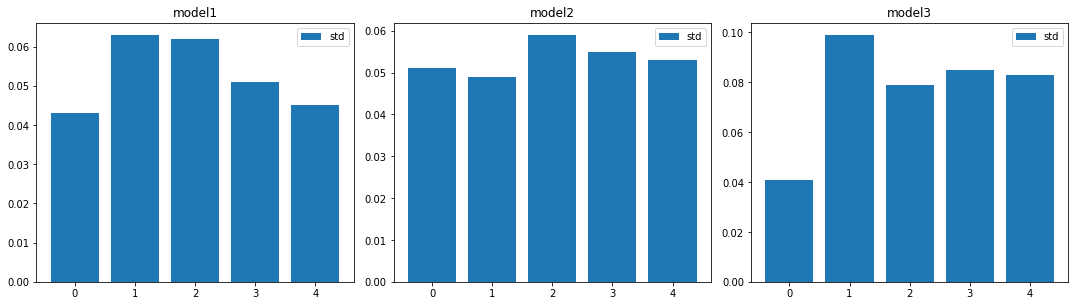

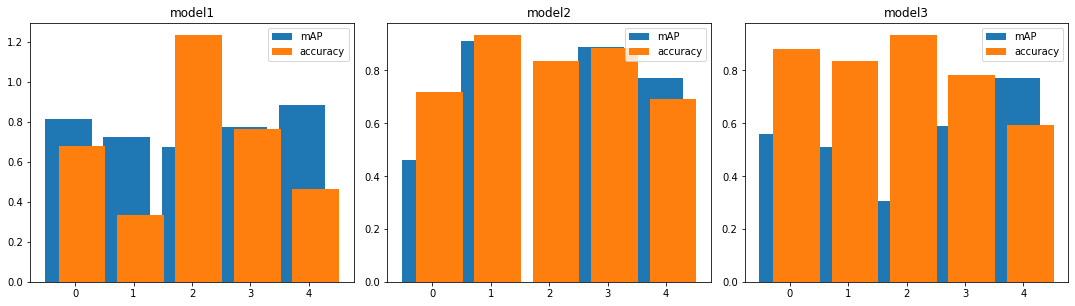

In [4]:
plot_stats([result1, result2, result3], ["std"], ["model1", "model2", "model3"] )
plot_stats([result1, result2, result3], ["mAP", "accuracy"], ["model1", "model2", "model3"] )

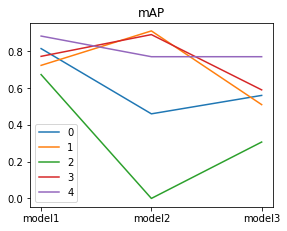

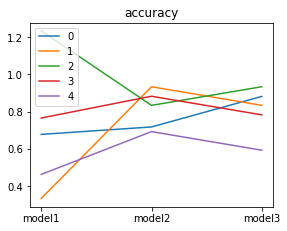

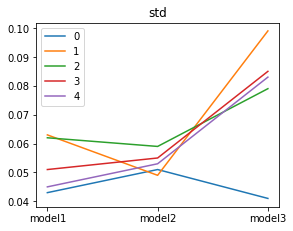

In [5]:
axis1 = plot_stats_by_type(np.array([result1, result2, result3]), 'mAP', ['model1', 'model2', 'model3'])
axis2 = plot_stats_by_type(np.array([result1, result2, result3]), 'accuracy', ['model1', 'model2', 'model3'])
axis3 = plot_stats_by_type(np.array([result1, result2, result3]), 'std', ['model1', 'model2', 'model3'])

## Starter class: before applying SOLID principles

In [6]:
class Analyzer:
    def __init__(self):
        self.names = []
        self.stats = []

    def add_result(self, name, stat):
        self.names.append(name)
        self.stats.append(stat)

    def calc_avg(self):
        return 0

    def plot_stats(self, metric_types, titles):
        x_bar = np.arange(self.stats[0].shape[0])
        bar_width = .35

        fig = plt.figure(figsize=(20,40))

        for i, stat in zip(range(len(self.stats)), self.stats):
            ax = fig.add_subplot(10, 4, i+1)
            # plt.axis('off')

            for t in metric_types:
                if "mAP" == t:
                    rects1 = ax.bar(x_bar - bar_width/3, stat[:, 0], label="mAP")
                if "std" == t:
                    rects2 = ax.bar(x_bar, stat[:, 1], label="std")
                if "accuracy" == t:
                    rects3 = ax.bar(x_bar + bar_width/3, stat[:, 2], label="accuracy")

            ax.set_xticks(x_bar)
            ax.set_xticklabels(x_bar)
            ax.set_title(titles[i])

            ax.legend()

    def plot_stats_by_type(self, metric_type, title, x_bins, n_clusters=5, axis=None):
        """
        hard-coded # of clusters and can't merge graphs either
        """
        if axis is None:
            fig = plt.figure(figsize=(20,40))
            axis = fig.add_subplot(10, 4, 1)

        npstats = np.array(self.stats)
        x_bins_len = len(x_bins)
        for cluster_id in range(n_clusters):
            # print(cluster_id, x_bins_len, npstats[:x_bins_len])
            if "mAP" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 0][:, cluster_id], label=cluster_id)
            if "std" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 1][:, cluster_id], label=cluster_id)
            if "accuracy" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 2][:, cluster_id], label=cluster_id)

        axis.set_title(title)
        axis.legend()
        return axis

    def plot(self, plot_type, metric_types, titles):
        if plot_type == "bar":
            print("Plotting a bar graph")
            print(f"Title: {titles}")
            self.plot_stats(metric_types, titles=titles)
        elif plot_type == "line":
            print("Plotting a line graph")
            print(f"Title: {titles}")
            self.plot_stats_by_type(metric_types, title=titles, x_bins=titles, n_clusters=5, axis=None)
        else:
            raise Exception(f"Unknown plot type: {plot_type}")

Plotting a bar graph
Title: ['model1', 'model2']
Plotting a bar graph
Title: ['model1', 'model2']
Plotting a line graph
Title: ['model1', 'model2']
Plotting a line graph
Title: ['model1', 'model2']


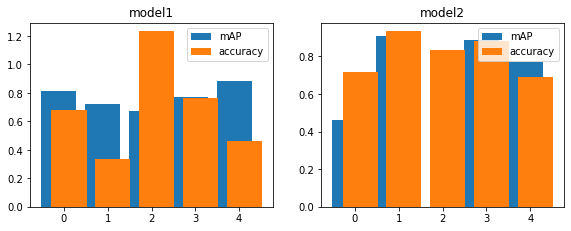

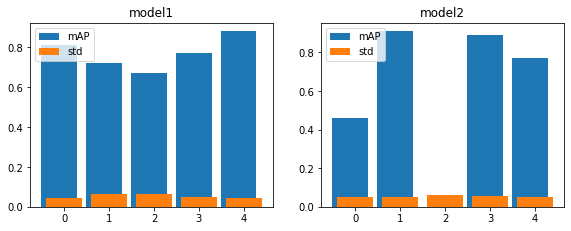

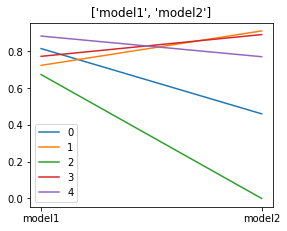

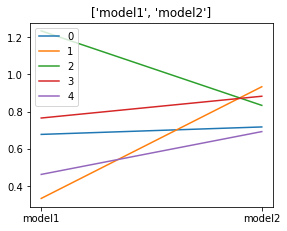

In [7]:
analyzer = Analyzer()

analyzer.add_result("model1", result1)
analyzer.add_result("model2", result2)
analyzer.plot("bar", ["mAP", "accuracy"], ["model1", "model2"])
analyzer.plot("bar", ["mAP", "std"], ["model1", "model2"])
analyzer.plot("line", "mAP", ['model1', 'model2'])
analyzer.plot("line", "accuracy", ['model1', 'model2'])

## Single Responsibility
Analyzer does a lot of things. Let's split it into two: Metrics class that holds the data and Plotter that handles visualization

In [8]:
class Metrics:
    def __init__(self):
        self.names = []
        self.stats = []

    def add_result(self, name, stat):
        self.names.append(name)
        self.stats.append(stat)

    def calc_avg(self):
        return 0

class Plotter:
    def __init__(self, metrics):
        self.metrics = metrics

    def plot_stats(self, metric_types, titles):
        x_bar = np.arange(self.metrics.stats[0].shape[0])
        bar_width = .35

        fig = plt.figure(figsize=(20,40))

        for i, stat in zip(range(len(self.metrics.stats)), self.metrics.stats):
            ax = fig.add_subplot(10, 4, i+1)
            # plt.axis('off')

            for t in metric_types:
                if "mAP" == t:
                    rects1 = ax.bar(x_bar - bar_width/3, stat[:, 0], label="mAP")
                if "std" == t:
                    rects2 = ax.bar(x_bar, stat[:, 1], label="std")
                if "accuracy" == t:
                    rects3 = ax.bar(x_bar + bar_width/3, stat[:, 2], label="accuracy")

            ax.set_xticks(x_bar)
            ax.set_xticklabels(x_bar)
            ax.set_title(titles[i])

            ax.legend()

    def plot_stats_by_type(self, metric_type, title, x_bins, n_clusters=5, axis=None):
        """
        hard-coded # of clusters and can't merge graphs either
        """
        if axis is None:
            fig = plt.figure(figsize=(20,40))
            axis = fig.add_subplot(10, 4, 1)

        npstats = np.array(self.metrics.stats)
        x_bins_len = len(x_bins)
        for cluster_id in range(n_clusters):
            # print(cluster_id, x_bins_len, npstats[:x_bins_len])
            if "mAP" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 0][:, cluster_id], label=cluster_id)
            if "std" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 1][:, cluster_id], label=cluster_id)
            if "accuracy" == metric_type:
                p = axis.plot(x_bins, npstats[:x_bins_len, :, 2][:, cluster_id], label=cluster_id)

        axis.set_title(title)
        axis.legend()
        return axis

    def plot(self, plot_type, metric_types, titles):
        if plot_type == "bar":
            print("Plotting a bar graph")
            print(f"Title: {titles}")
            self.plot_stats(metric_types, titles=titles)
        elif plot_type == "line":
            print("Plotting a line graph")
            print(f"Title: {titles}")
            self.plot_stats_by_type(metric_types, title=titles, x_bins=titles, n_clusters=5, axis=None)
        else:
            raise Exception(f"Unknown plot type: {plot_type}")

Plotting a bar graph
Title: ['model1', 'model2']
Plotting a bar graph
Title: ['model1', 'model2']
Plotting a line graph
Title: ['model1', 'model2']
Plotting a line graph
Title: ['model1', 'model2']


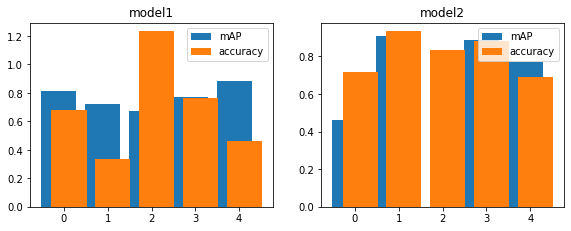

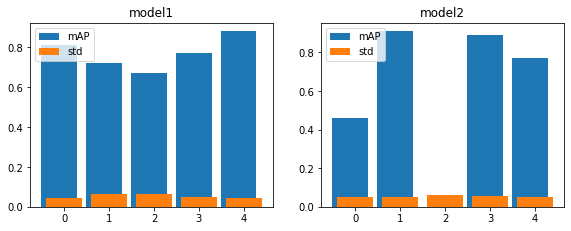

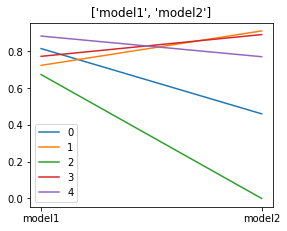

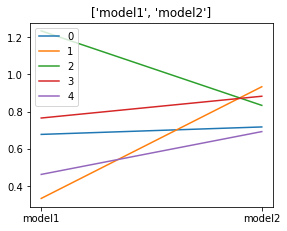

In [9]:
metrics = Metrics()

metrics.add_result("model1", result1)
metrics.add_result("model2", result2)

plotter = Plotter(metrics)

plotter.plot("bar", ["mAP", "accuracy"], ["model1", "model2"])
plotter.plot("bar", ["mAP", "std"], ["model1", "model2"])
plotter.plot("line", "mAP", ['model1', 'model2'])
plotter.plot("line", "accuracy", ['model1', 'model2'])

## Open/Closed Principle
Now that we have two classes each doing one thing, let's see if they are good for extension. We immediately see problems with Visualizer. Right now, it can plot bar-graph and line graph, but what if we want to do more? Keep modifying the class is not a good idea so let's fix this.

In [10]:
from abc import ABC, abstractmethod


class Metrics:
    def __init__(self):
        self.names = []
        self.stats = []

    def add_result(self, name, stat):
        self.names.append(name)
        self.stats.append(stat)

    def calc_avg(self):
        pass

class Visualizer(ABC):
    def __init__(self, metrics):
        self.metrics = metrics


    @abstractmethod
    def plot(self, metric_types, titles):
        pass

class DataViewVisulaizer(Visualizer):
    """
    visualizes the prediction results per dataset or clusters
    """
    def plot(self, metric_types, titles):
        x_bar = np.arange(self.metrics.stats[0].shape[0])
        bar_width = .35

        fig = plt.figure(figsize=(20,40))

        for i, stat in zip(range(len(self.metrics.stats)), self.metrics.stats):
            ax = fig.add_subplot(10, 4, i+1)
            # plt.axis('off')

            for t in metric_types:
                if "mAP" == t:
                    rects1 = ax.bar(x_bar - bar_width/3, stat[:, 0], label="mAP")
                if "std" == t:
                    rects2 = ax.bar(x_bar, stat[:, 1], label="std")
                if "accuracy" == t:
                    rects3 = ax.bar(x_bar + bar_width/3, stat[:, 2], label="accuracy")

            ax.set_xticks(x_bar)
            ax.set_xticklabels(x_bar)
            ax.set_title(titles[i])

            ax.legend()

class ModelComparisonVisulaizer(Visualizer):
    """
    Model comparison visualizer: visualizes prediction results by comparing different models
    """
    def plot(self, metric_types, titles):
        fig = plt.figure(figsize=(20,40))
        axis = fig.add_subplot(10, 4, 1)

        npstats = np.array(self.metrics.stats)
        x_bins_len = len(self.metrics.names)
        n_clusters = len(self.metrics.stats[0])
        for cluster_id in range(n_clusters):
            # print(cluster_id, x_bins_len, npstats[:x_bins_len])
            if "mAP" == metric_types[0]:
                p = axis.plot(self.metrics.names, npstats[:x_bins_len, :, 0][:, cluster_id], label=cluster_id)
            if "std" == metric_types[0]:
                p = axis.plot(self.metrics.names, npstats[:x_bins_len, :, 1][:, cluster_id], label=cluster_id)
            if "accuracy" == metric_types[0]:
                p = axis.plot(self.metrics.names, npstats[:x_bins_len, :, 2][:, cluster_id], label=cluster_id)

        axis.set_title(metric_types[0])
        axis.legend()
        return axis

<AxesSubplot:title={'center':'accuracy'}>

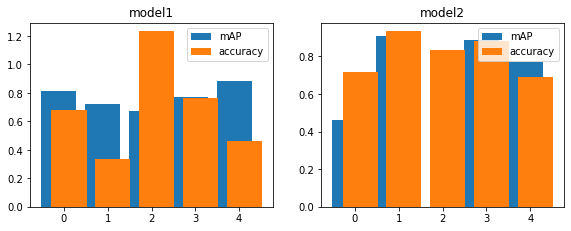

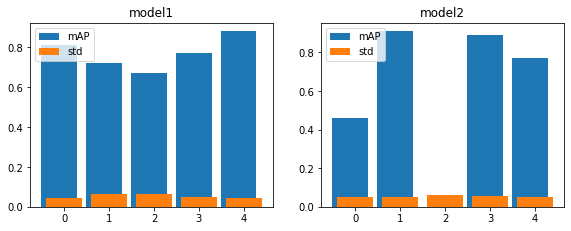

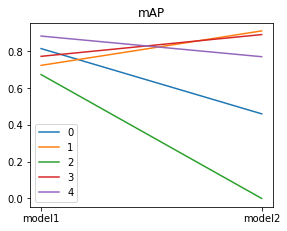

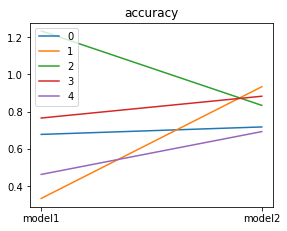

In [11]:
metrics = Metrics()

metrics.add_result("model1", result1)
metrics.add_result("model2", result2)

visualizer = DataViewVisulaizer(metrics)

visualizer.plot(["mAP", "accuracy"], ["model1", "model2"])
visualizer.plot(["mAP", "std"], ["model1", "model2"])

visualizer = ModelComparisonVisulaizer(metrics)
visualizer.plot(["mAP"], ['model1', 'model2'])
visualizer.plot(["accuracy"], ['model1', 'model2'])

## TODO

More to be done using SOLID principles.